# THis notebook analyzes all the companies that produce more than 100 times their own input volume of wood

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('sample_data_short.csv', sep = ';')

/home/bcoelho/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11,17,18,19,20,33,34,35,36,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data reshape

In [4]:
ut_avoid = {'Cancelado', 'Suspenso'}
data.query('ultima_transacao not in @ut_avoid', inplace=True)

In [27]:
#temp = data.groupby('numero_serie_dof').nth(0)
#temp.drop(columns=['volume', 'valor'], inplace=True)

In [29]:
#data = pd.concat([temp, data.groupby('numero_serie_dof')[['volume', 'valor']].sum()], axis = 1)

# Elo volume change ratio

In [5]:
data.produto_agrupado.unique()

array(['Madeira serrada bruta', 'Produtos acabados de madeira', 'Tora',
       'Blocos e dormentes', 'Resíduos industriais',
       'Toretes, estacas, palanques e mourões',
       'Cavacos, lascas, cascas e rachas', 'Chapas e Lâminas de madeira',
       'Carvão e lenha'], dtype=object)

In [6]:
elo1 = {'Tora'}
elo2 = {'Madeira serrada bruta', 
        'Blocos e dormentes', 'Chapas e Lâminas de madeira'}
elo_non_tora = {'Madeira serrada bruta', 'Produtos acabados de madeira', 
       'Blocos e dormentes', 'Resíduos industriais',
       'Toretes, estacas, palanques e mourões',
       'Cavacos, lascas, cascas e rachas', 'Chapas e Lâminas de madeira',
       'Carvão e lenha'}
elo3 = {'Produtos acabados de madeira'}

In [7]:
remetentes = data.nome_remetente.unique()

In [10]:
elo1 = {'Tora'}
elo2 = elo_non_tora

X1 = data.query('produto_agrupado in @elo1 and nome_destinatario in @remetentes')
vol_elo1 = X1.groupby('nome_destinatario')['volume'].sum()

X2out = data.query('produto_agrupado in @elo2')
vol_elo2out = X2out.groupby('nome_remetente')['volume'].sum()

ratio_2_over_1 = vol_elo2out / vol_elo1
ratio_2_over_1

A A PORTAS & PORTAS LTDA - ME                                                   NaN
A BREVE FERREIRA ME                                                             NaN
A D PORTAS E JANELAS EIRELI                                                     NaN
A M C MADEIRAS LTDA                                                             NaN
A NOVACK JUNIOR EPP                                                             NaN
A P T COMERCIO DE MADEIRAS EIRELI                                          1.060531
A R JONAS EIRELI - ME                                                           NaN
A R LEMES MADEIRAS - ME                                                    2.665304
A S DA SILVA BIBIANO IMPORT E EXPORT - ME                                       NaN
A S MEIRA - ME                                                             1.610829
A. A. MARQUES LTDA ME                                                           NaN
A. A. PENA - ME                                                             

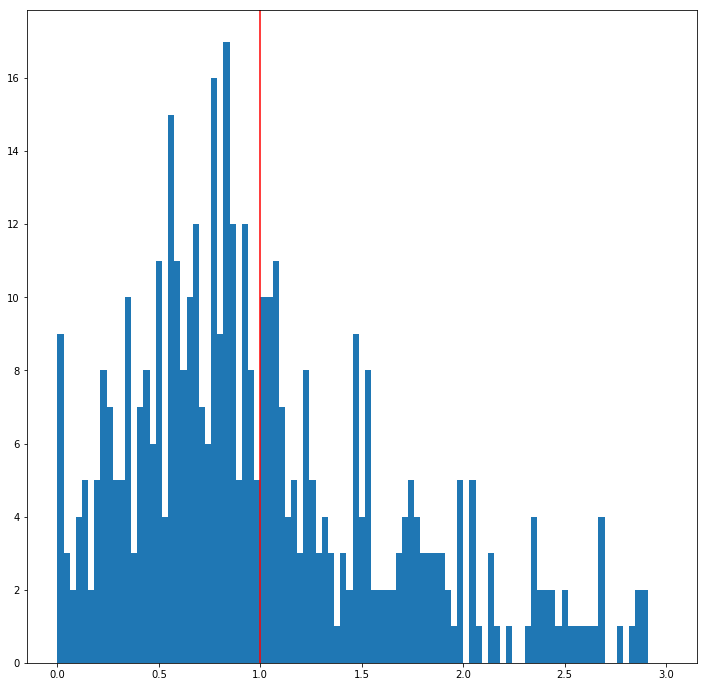

In [21]:
plt.figure(figsize=(12, 12))
plt.hist(ratio_2_over_1.dropna() , bins = np.linspace(0, 3, 100));
plt.axvline(x=1, color="r")

In [42]:
over_10 = ratio_2_over_1[ratio_2_over_1 > 10]
len(over_10)

54

In [48]:
over_100 = ratio_2_over_1[ratio_2_over_1 > 100]
len(over_100)

18

In [50]:
over_100.index.unique()

Index(['A.S COM. IND.IMP. EXP DE MADEIRAS LTDA-ME',
       'INDUSTRIA E COMERCIO NOVA SAMUEL LTDA-ME', 'LG MADEIRAS LTDA - ME',
       'MADEIREIRA IMIGRANTES LTDA - ME',
       'MADEIREIRA SANTO ANTONIO DE PÁDUA LTDA', 'MADEREIRA CASTOR LTDA EPP',
       'MARCON INDUSTRIA E COMERCIO DE MADEIRAS LTDA ME',
       'MATEUS DE JESUS ALMEIDA E CIA LTDA-EPP', 'N. MEZZOMO',
       'NOSSILA MATERIAIS DE CONSTRUÇÃO LTDA - ME', 'PORTELA MADEIRAS EIRELI',
       'ROZA M. DOS SANTOS - (ME)',
       'S P COMERCIO VAREJ E ATAC MADEIRA E MATERIAIS DE CONSTRUÇÃO EIRELI-ME',
       'S. DE P. CARDOSO  INDUSTRIA E COMERCIO DE MADEIRAS ME',
       'S.H. DO NASCIMENTO ME', 'V. PRESTES DE OLIVEIRA ME',
       'W. S. SENES - ME', 'WIRLEIDE F. DOS SANTOS - (ME)'],
      dtype='object')

In [46]:
data["nome_remetente"].nunique()

1475

In [43]:
over_10.index.unique()

Index(['A.S COM. IND.IMP. EXP DE MADEIRAS LTDA-ME',
       'AFONSO E FARIAS COMERCIO DE MATERIAIS DE CONSTRUÇÃO LTDA - ME',
       'AGROINDUSTRIAL SAMAUMA IMP. E EXP. DE ARTF DE MADEIRA LTDA',
       'BEIRA RIO AGRO INDUSTRIAL MADEIREIRA LTDA - ME',
       'BEM-TI-VI IND COM IMP E EXP LTDA',
       'BRANDAO BENEFICIAMENTO DE MADEIRAS LTDA ME',
       'CIDEMAD- INDÚSTRIA, COMÉRCIO E EXPORTAÇÃO DE MADEIRAS LTDA - EPP',
       'CLAUDIO OMAR PASSARELLO & CIA LTDA - ME',
       'DI ARTUSO INDUSTRIA MADEIREIRA LTDA-EPP',
       'DILLIMAD BENEFICIAMENTO E COM. DE MADEIRAS LTDA', 'E. B. ALVES',
       'E. L. LOEVE INDUSTRIA E COMERCIO DE MADEIRAS - EPP',
       'EURO MADEIRAS EIRELI - EPP', 'FABIOLA REGINA MENDES DE SOUZA - ME',
       'FG INDUSTRIA DE MADEIRAS LTDA', 'G. NUNES DA COSTA - ME',
       'H A SILVA MADEIRAS -ME',
       'INDUSTRIA COM. E EXP. DE MADEIRAS CEDROARANA LTDA-EPP',
       'INDUSTRIA E COMERCIO NOVA SAMUEL LTDA-ME', 'J.B. ARCE - ME',
       'J.M. NIZA EIRELI - ME', 'JEAN

In [39]:
data[data["nome_destinatario"].isin(over_10.index.values)]\
        ["municipio_origem"].value_counts(ascending=False).reset_index().head(10)

,index,municipio_origem
0,PORTO VELHO,7028
1,BURITIS,5002
2,CUJUBIM,3329
3,CANDEIAS DO JAMARI,3205
4,ARIQUEMES,2608
5,ALTO PARAISO,2130
6,MACHADINHO D'OESTE,2010
7,RIO BRANCO,1740
8,NOVA MAMORE,941
9,SENA MADUREIRA,758


In [41]:
data["municipio_origem"].value_counts(ascending=False).head(50)

PORTO VELHO                 285487
CANDEIAS DO JAMARI          113898
ESPIGAO D'OESTE             102598
CUJUBIM                     101089
ARIQUEMES                    78022
RIO BRANCO                   75551
MACHADINHO D'OESTE           68471
ALTO PARAISO                 53060
BURITIS                      39902
ITAPUA DO OESTE              30090
JI-PARANA                    30062
SENA MADUREIRA               29777
VILHENA                      19328
PIMENTA BUENO                18952
NOVA MAMORE                  18743
CHUPINGUAIA                  13094
CACOAL                       12976
ROLIM DE MOURA               11727
RIO CRESPO                   10881
JARU                          9712
OURO PRETO DO OESTE           7183
ALTA FLORESTA D'OESTE         7177
COLORADO DO OESTE             7046
CAMPO NOVO DE RONDONIA        6906
VALE DO ANARI                 6776
MINISTRO ANDREAZZA            6731
FEIJO                         6647
PORTO ACRE                    6355
SERINGUEIRAS        

In [4]:
ut_avoid = {'Cancelado', 'Suspenso'}
data.query('ultima_transacao not in @ut_avoid', inplace=True)

In [63]:
elo1 = [1]
elo2 = [12]

X1 = data.query('id_produto_agrupado in @elo1 and nome_destinatario in @remetentes')
senders = X1["nome_destinatario"].unique()
companies = data.query('id_produto_agrupado in @elo2 and nome_remetente in @senders')
companies = companies["nome_remetente"].unique()

In [67]:
len(companies) / data["nome_remetente"].nunique()

0.36745762711864405

In [72]:
companies

array(['MARTINS E RABELO LTDA - ME',
       'AGROCORTEX MADEIRAS DO ACRE AGROFLORESTAL LTDA',
       'FOX LAMINADOS LTDA', 'IND E COM DE MAD INDIA PORA LTDA',
       'E. B. ALVES', 'F.ARTUSO EIRELI EPP', 'ROZA M. DOS SANTOS - (ME)',
       'MADEIREIRA JR LTDA - ME', 'SENA MADEIREIRA LTDA',
       'IND. E COM. DE MADEIRA TRIANGULO LTDA', 'PORTELA MADEIRAS EIRELI',
       'MADMENDES IND. E COM. DE MAD. IMP. EXP. LTDA. ME',
       'L. A. GRAMS IMPORTAÇÃO E EXPORTAÇÃO - ME',
       'RABELO E FEITOSA LTDA - ME', 'MADEIREIRA JANEL IND E COM LTDA',
       'CAETANO AGROINDUSTRIA LTDA. ME', 'R ALVES DE MORAIS',
       'ACRE MADEIRAS & ENERGIA ALTERNATIVA LTDA',
       'CASA DO MARCENEIRO EIRELI',
       'RECOMAL RED IND E COM DE MADEIRAS LTDA',
       'OURO BRANCO MADEIRAS IMP. E EXP. LTDA.', 'L.N.MOTA ME',
       'UNIACRE INDUSTRIA E COMERCIO DE MADEIRA', 'C. DAMSKI EIRELI - ME',
       'WIRLEIDE F. DOS SANTOS - (ME)', 'MADEIREIRA JR LTDA-ME',
       'CIA DE DESENVOLVIMENTO NOVA OLINDA', 'SERR

In [71]:
len(companies)

542

In [ ]:
da

In [73]:
data.query("nome_remetente in @companies")

,id,nome_remetente,cpf_remetente,uf_origem,municipio_origem,cd_mun_origem,latitude_origem,longitude_origem,ctf_remetente,tipo_origem,...,produto,produto_agrupado,id_produto_agrupado,nome_cientifico,nome_popular,especie_agrupada,id_especie_agrupada,volume,unidade,valor
0,690796,MARTINS E RABELO LTDA - ME,20201146000102,AC,RIO BRANCO,1200401,-10.066148,-68.371045,6057030,PATIO,...,Madeira serrada (viga),Madeira serrada bruta,12,Apuleia leiocarpa,Garapeira,Garapeira,117,0.5220,M3,78.30
1,690797,MARTINS E RABELO LTDA - ME,20201146000102,AC,RIO BRANCO,1200401,-10.066148,-68.371045,6057030,PATIO,...,Madeira serrada (viga),Madeira serrada bruta,12,Couratari guianensis,Tauari,Tauari,70,5.2000,M3,78.00
2,690798,L. A. GRAMS IMPORTAÇÃO E EXPORTAÇÃO - ME,24438974000110,AC,SENA MADUREIRA,1200500,-9.771175,-69.381570,6559713,PATIO,...,Alisar,Produtos acabados de madeira,13,Couratari macrosperma,Tauari,Tauari,70,1.9080,M3,1457.65
3,690799,L. A. GRAMS IMPORTAÇÃO E EXPORTAÇÃO - ME,24438974000110,AC,SENA MADUREIRA,1200500,-9.771175,-69.381570,6559713,PATIO,...,Portal ou Batente,Produtos acabados de madeira,13,Couratari macrosperma,Tauari,Tauari,70,7.3140,M3,4587.94
7,690803,AGROCORTEX MADEIRAS DO ACRE AGROFLORESTAL LTDA,19848073000166,AC,MANOEL URBANO,1200344,-9.381206,-69.853924,6046829,PATIO,...,Tora,Tora,1,Eschweilera grandiflora,Matamatá,Biriba - Matamatá,4,15.3710,M3,323.87
11,690808,AGROCORTEX MADEIRAS DO ACRE AGROFLORESTAL LTDA,19848073000166,AC,MANOEL URBANO,1200344,-9.381206,-69.853924,6046829,PATIO,...,Madeira serrada (tábua),Madeira serrada bruta,12,Dipteryx odorata,Cumaru,Cumaru,63,32.5190,M3,79938.15
14,690811,MARTINS E RABELO LTDA - ME,20201146000102,AC,RIO BRANCO,1200401,-10.066148,-68.371045,6057030,PATIO,...,"Bloco, quadrado ou filé",Blocos e dormentes,4,Eschweilera grandiflora,Matamatárosa,Biriba - Matamatá,4,0.1270,M3,19.05
15,690812,MARTINS E RABELO LTDA - ME,20201146000102,AC,RIO BRANCO,1200401,-10.066148,-68.371045,6057030,PATIO,...,Madeira serrada (caibro),Madeira serrada bruta,12,Caryocar glabrum,Pequiarana,Pequiá,50,0.9040,M3,135.60
16,690813,MARTINS E RABELO LTDA - ME,20201146000102,AC,RIO BRANCO,1200401,-10.066148,-68.371045,6057030,PATIO,...,Madeira serrada (caibro),Madeira serrada bruta,12,Caryocar villosum,Pequi,Pequiá,50,0.1710,M3,25.65
17,690814,MARTINS E RABELO LTDA - ME,20201146000102,AC,RIO BRANCO,1200401,-10.066148,-68.371045,6057030,PATIO,...,Madeira serrada (tábua),Madeira serrada bruta,12,Caryocar villosum,Pequirana,Pequiá,50,2.0000,M3,300.00


In [75]:
len(data.query("nome_remetente in @companies")) / len(data)

0.6238609606804536